# <font color="green">Mega Millions Data Analysis</font>
### *Dane Mariott & Shelby Fullbright*

In [1]:
%matplotlib inline

###### Above, the percent character is employed to invoke "jupyter magic" which will display matplotlib visuals directly in our notebook. 

###### Here we're importing the necessary modules/libraries to perform our analysis and configure visualizations.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

###### Here pandas will connect to the API and read its .json format into a dataframe to be further manipulated in our notebook.

In [3]:
# Import dataframe from API
df = pd.read_json('http://127.0.0.1:5000/api/v1/test_table')

###### This cell checks that our whole dataset has been imported, which was 949 rows and 42 columns at last persistence to database.

In [4]:
# Ensure proper row and column count
df.shape

(949, 42)

###### This cell prints the top 5 rows of our dataset for visual inspection to be sure the dataframe rendered accurately.

In [5]:
# Print first 5 rows for visual inspection of data
df.head()

,Draw date,Jackpot,Jackpot CO Winners,Jackpot Cash Value,Jackpot Winners,Last Day To Claim,Match 0 + Megaball CO Winners,Match 0 + Megaball CO Winners (with Megaplier),Match 0 + Megaball Prize,Match 0 + Megaball Prize (with Megaplier),...,Match 4 Prize,Match 4 Prize (with Megaplier),Match 5 CO Winners,Match 5 CO Winners (with Megaplier),Match 5 Prize,Match 5 Prize (with Megaplier),Megaball,Megaplier,Winning Numbers,index
0,"June 18, 2019 ?","$50,000,000",0.0,"$32,700,000",0.0,"Dec. 15, 2019",1429.0,1390.0,$2,$4,...,$500,"$1,000",0.0,0.0,"$1,000,000","$2,000,000",21,2,12 - 14 - 22 - 24 - 48,0
1,"June 14, 2019 ?","$45,000,000",0.0,"$29,200,000",0.0,"Dec. 11, 2019",1588.0,1394.0,$2,$4,...,$500,"$1,000",0.0,0.0,"$1,000,000","$2,000,000",6,2,19 - 40 - 47 - 57 - 65,1
2,"June 11, 2019 ?","$40,000,000",0.0,"$25,800,000",0.0,"Dec. 8, 2019",1971.0,1810.0,$2,$6,...,$500,"$1,500",0.0,0.0,"$1,000,000","$3,000,000",13,3,20 - 34 - 39 - 43 - 57,2
3,"June 7, 2019 ?","$530,000,000",0.0,"$345,200,000",1.0,"Dec. 4, 2019",7539.0,4812.0,$2,$6,...,$500,"$1,500",0.0,0.0,"$1,000,000","$3,000,000",2,3,17 - 19 - 27 - 40 - 68,3
4,"June 4, 2019 ?","$475,000,000",0.0,"$308,200,000",0.0,"Dec. 1, 2019",6938.0,4552.0,$2,$4,...,$500,"$1,000",0.0,1.0,"$1,000,000","$2,000,000",25,2,25 - 37 - 46 - 48 - 68,4


###### The first thing here is to separate the "Jackpot Winners" column into two singular instances of winning and losing because while losing is simply "0" winners, winning could be "1, 2, 3, etc." winners. Turning the "Jackpot Winners" column into a boolean expression stops the chart from displaying every possible instance "winners" and "losers" per month. The second issue is that we needed to strip "Draw date" to month alone or every cell would render as an individual value and we would never find the frequency of "wins by month". Lastly, we stacked "losses" and "wins" as true/false singular columns so that the reader could see the highest loss in months as well as wins. 

Text(0, 0.5, 'Losses/Wins')

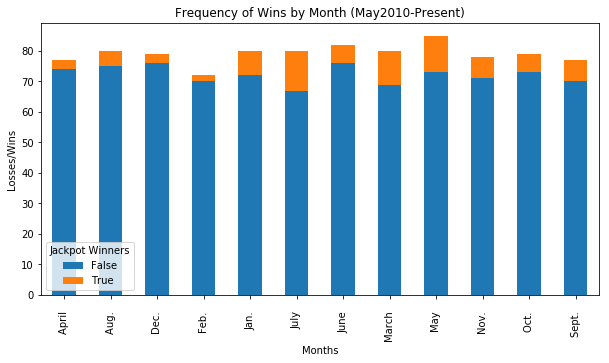

In [6]:
# Munge data to analyze specific properties of our data's vatiables
df['Jackpot Winners'] = df['Jackpot Winners'] > 0
df['Draw date'] = df['Draw date'].replace('[0-9,?' ']', '', regex=True)
count = df.groupby(['Draw date', 'Jackpot Winners']).size()
# Display the most frequent wins and losses aggregated by month throughout history of game
plt.rcParams['figure.figsize'] = [10, 5]
count.unstack().plot(kind='bar', stacked=True)
plt.title('Frequency of Wins by Month (May2010-Present)')
plt.xlabel('Months')
plt.ylabel('Losses/Wins')

###### Pandas formats the "Megaball" column as a "series" and assigns default values of float or object. The dataframe default then renders the cell values as "NaN" (not a number) which had to be fixed by force casting them to integer. Once the data could be read as a number, we employed a pandas value count to find the frequency of occurence for drawn Megaball numbers. The Megaball numbers are then plotted by frequency of occurence in descending order so that the reader can easily see which numbers are most likely to be drawn.

Text(0, 0.5, 'Frequency')

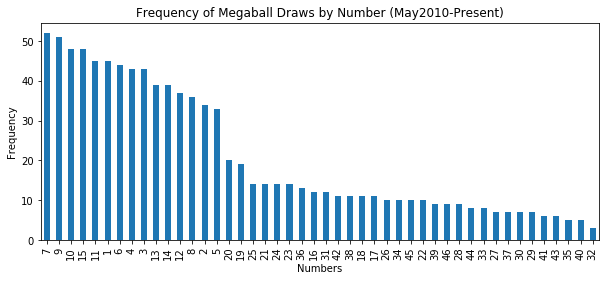

In [7]:
# Munge data to analyze specific properties of our data's vatiables
df['Megaball'] = pd.to_numeric(df['Megaball'], errors='coerce')
count2 = df['Megaball'].value_counts(ascending=False)
# Display the most frequently drawn Megaball numbers throughout history of game
plt.rcParams['figure.figsize'] = [10, 4]
count2.plot(kind='bar')
plt.title('Frequency of Megaball Draws by Number (May2010-Present)')
plt.xlabel('Numbers')
plt.ylabel('Frequency')